In [1]:
using FluidDynTools
using ViscousFlow
using Plots

In [70]:
Δx = 0.02
xlim = (-2,2)
ylim = (-2,2)
g = PhysicalGrid(xlim,ylim,Δx)
cache = SurfaceVectorCache(g);

In [71]:
σ = 0.3
gauss4 = SpatialGaussian(σ,σ,-1,0,1) + SpatialGaussian(σ,σ,1,0,1) + SpatialGaussian(σ,σ,0,1,-1) + SpatialGaussian(σ,σ,0,-1,-1);

In [72]:
ω = zeros_gridcurl(cache);
evaluate_field!(ω,gauss4,cache);

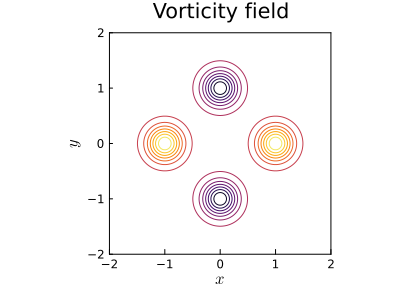

In [73]:
plot(ω,cache,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Vorticity field")

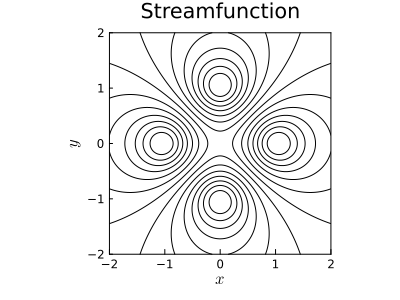

In [74]:
ψ = -ω
inverse_laplacian!(ψ,cache)
ps = plot(ψ,cache,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamfunction")

In [75]:
vel = zeros_grid(cache)
curl!(vel,ψ,cache);

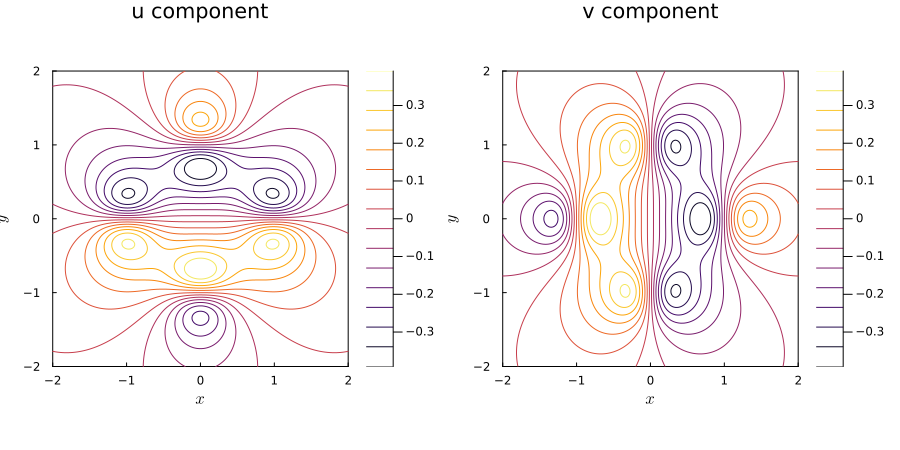

In [76]:
curl!(vel,ψ,cache)
plot(
    plot(vel.u,cache,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="u component",colorbar=:true),
    plot(vel.v,cache,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="v component",colorbar=:true),
    size=(900,450))

In [77]:
using NLsolve

In [78]:
umagsq = magsq(vel);

In [79]:
umagsq_fcn = interpolatable_field(umagsq,g);

In [80]:
function f!(F,x)
    F[1] = umagsq_fcn(x[1],x[2])
end

f! (generic function with 1 method)

In [81]:
xguess = [1.0,0]
sol = nlsolve(f!, xguess)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.0, 0.0]
 * Zero: [1.0464470463610642, -1.7513711164952462e-10]
 * Inf-norm of residuals: 0.000000
 * Iterations: 1000
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: false
 * Function Calls (f): 95
 * Jacobian Calls (df/dx): 17

In [82]:
sol.zero

2-element Vector{Float64}:
  1.0464470463610642
 -1.7513711164952462e-10

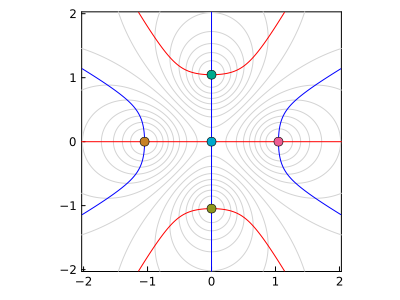

In [83]:
plot(ψ,cache,color=:lightgray)
plot!(vel.u,cache,levels=[0],color=:red,xlim=(-2,2),ylim=(-2,2)) # x component in red
plot!(vel.v,cache,levels=[0],color=:blue) # y component in red
scatter!([sol.zero[1]],[0],markersize=5)
scatter!(-[sol.zero[1]],[0],markersize=5)
scatter!([0],[sol.zero[1]],markersize=5)
scatter!([0],-[sol.zero[1]],markersize=5)
scatter!([0],[0],markersize=5)

In [88]:
Δx = 0.02
xlim = (-2,2)
ylim = (-2,2)
h = PhysicalGrid(xlim,ylim,Δx)
cache = SurfaceVectorCache(h);

In [89]:
σ = 0.3
gauss3 = SpatialGaussian(σ,σ,-1,0,1) + SpatialGaussian(σ,σ,1,0,1) + SpatialGaussian(σ,σ,0,1,-1);

In [90]:
ω = zeros_gridcurl(cache);
evaluate_field!(ω,gauss3,cache);

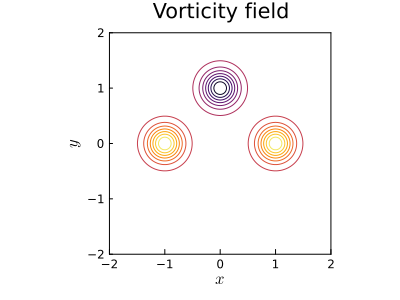

In [91]:
plot(ω,cache,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Vorticity field")

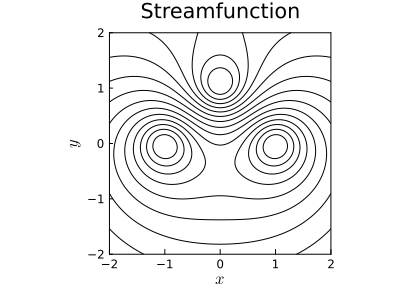

In [92]:
ψ = -ω
inverse_laplacian!(ψ,cache)
ps = plot(ψ,cache,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamfunction")

In [93]:
vel = zeros_grid(cache)
curl!(vel,ψ,cache);

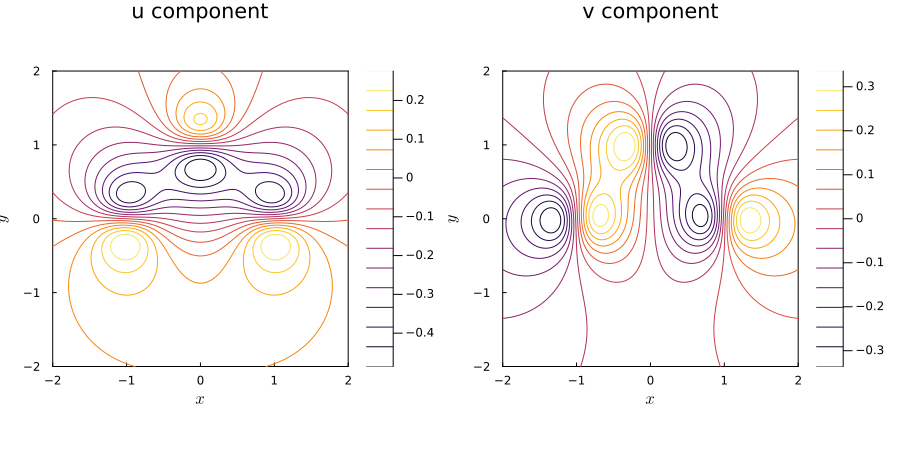

In [94]:
curl!(vel,ψ,cache)
plot(
    plot(vel.u,cache,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="u component",colorbar=:true),
    plot(vel.v,cache,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="v component",colorbar=:true),
    size=(900,450))

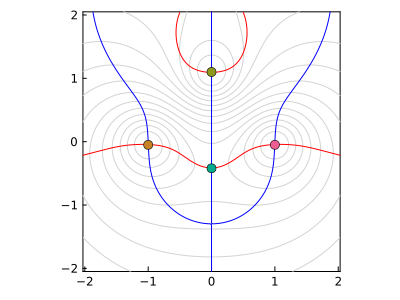

In [103]:
plot(ψ,cache,color=:lightgray)
plot!(vel.u,cache,levels=[0],color=:red,xlim=(-2,2),ylim=(-2,2)) # x component in red
plot!(vel.v,cache,levels=[0],color=:blue) # y component in red
scatter!([1],[-0.05],markersize=5)
scatter!([-1],[-0.05],markersize=5)
scatter!([0],[-0.42],markersize=5)
scatter!([0],[1.1],markersize=5)